In [156]:
import pandas as pd
import numpy as np

In [157]:
featureDF=pd.read_csv('train.csv')
featureDF=featureDF.set_index('Unnamed: 0')

In [158]:
target=featureDF['target']
featureDF=featureDF.drop(columns='target')


In [159]:
featureDF=featureDF.fillna(0)


In [160]:
testDF=pd.read_csv('test.csv')
testDF=testDF.set_index('Unnamed: 0')

In [161]:
test_target=testDF['target']
testDF=testDF.drop(columns='target')
testDF=testDF.fillna(0)


In [162]:
testDF

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
en-1.txt,0.067823,0.013459,0.034328,0.048817,0.116114,0.020014,0.016002,0.022798,0.076920,0.002411,...,0.000658,0.070124,0.079550,0.075122,0.025910,0.014775,0.036103,0.005634,0.013087,0.000416
en-2.txt,0.080283,0.016174,0.035350,0.038342,0.129865,0.016704,0.018950,0.042697,0.073986,0.004463,...,0.001138,0.066227,0.063599,0.078880,0.027631,0.013026,0.014880,0.002119,0.013300,0.001491
fr-3.txt,0.056764,0.012008,0.035835,0.049876,0.127155,0.013476,0.008620,0.007303,0.086050,0.002786,...,0.006362,0.067304,0.090078,0.068433,0.042912,0.013852,0.028909,0.009298,0.005157,0.000414
fr-4.txt,0.071875,0.011413,0.038476,0.040330,0.139357,0.012185,0.015386,0.018410,0.079491,0.004150,...,0.006887,0.064060,0.073023,0.066334,0.048652,0.013598,0.002892,0.004282,0.003355,0.001192
id-5.txt,0.104322,0.022424,0.015275,0.044199,0.089373,0.011375,0.026649,0.015600,0.090510,0.005362,...,0.000650,0.069548,0.079298,0.052811,0.036887,0.016575,0.033637,0.004875,0.009587,0.000487
id-6.txt,0.164736,0.026052,0.014586,0.041574,0.088257,0.006201,0.035997,0.025116,0.082056,0.007254,...,0.000156,0.053625,0.048789,0.053235,0.047424,0.004680,0.004602,0.000468,0.014820,0.000585
tl-7.txt,0.185554,0.019668,0.014370,0.026720,0.033086,0.007966,0.082523,0.014065,0.081723,0.000229,...,0.000152,0.035830,0.058700,0.052258,0.023899,0.004803,0.028359,0.003392,0.017076,0.000419
tl-8.txt,0.167676,0.016949,0.018765,0.024818,0.055690,0.009080,0.066586,0.011501,0.070218,0.000605,...,0.001211,0.044189,0.052663,0.061743,0.037530,0.001816,0.016344,0.000605,0.018160,0.000605


## 모델학습

DecisionTreeClassfier

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
dt_model=DecisionTreeClassifier(random_state=7,max_depth=30,min_samples_leaf=10)
dt_model.fit(featureDF,target)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=10, random_state=7)

In [192]:
dt_model.score(featureDF,target)

0.5

In [193]:
dt_model.score(testDF,test_target)

0.5

In [194]:
from sklearn.tree import export_graphviz

export_graphviz(dt_model,out_file='tree.dot',
                feature_names=featureDF.columns,impurity=True,filled=True,
                rounded=True, # 동글동글
                )

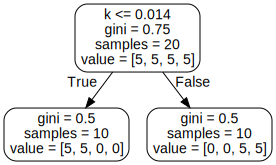

In [195]:
##(2) dot 파일 출력
import graphviz

# 파일데이터 읽어오기
with open('tree.dot') as f:
    dot_data=f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

In [169]:
dt_model.get_depth()

1

In [170]:
dt_model.get_n_leaves()

2

OVR

In [171]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf=OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(featureDF,target)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [172]:
ovr_clf.score(featureDF,target)

0.85

In [173]:
ovr_clf.score(testDF,test_target)

0.75

Voting

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [175]:
# 알고리즘 인스턴스 생성
k_model=KNeighborsClassifier()

# 보팅인스턴스 생성
vh_model=VotingClassifier(estimators=[('dt_model',dt_model),('ovr_clf',ovr_clf)],voting='hard')

# 소프트 보팅인스턴스 생성
vs_model=VotingClassifier(estimators=[('dt_model',dt_model),('ovr_clf',ovr_clf)],voting='soft')


In [176]:
# 학습 진행
vh_model.fit(featureDF,target) 
vs_model.fit(featureDF,target) 

VotingClassifier(estimators=[('dt_model',
                              DecisionTreeClassifier(max_depth=30,
                                                     min_samples_leaf=10,
                                                     random_state=10)),
                             ('ovr_clf',
                              OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000)))],
                 voting='soft')

In [177]:
hard_train_score=vh_model.score(featureDF,target)
hard_test_score=vh_model.score(testDF,test_target)

soft_train_score=vs_model.score(featureDF,target)
soft_test_score=vs_model.score(testDF,test_target)

In [178]:
print(F'hard_train_score : hard_test_score = {hard_train_score} : {hard_test_score}')

print(F'soft_train_score : soft_test_score = {soft_train_score} : {soft_test_score}')

hard_train_score : hard_test_score = 0.5 : 0.375
soft_train_score : soft_test_score = 0.85 : 0.75


RandomForest

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
rf_model=RandomForestClassifier(random_state=5)

# 학습진행
rf_model.fit(featureDF,target)

RandomForestClassifier(random_state=5)

In [181]:
rf_model.score(featureDF,target)

1.0

In [182]:
rf_model.score(testDF,test_target)

1.0

## 튜닝

In [183]:
from sklearn.model_selection import RandomizedSearchCV

In [184]:
params={'max_depth':range(20,40),'min_samples_leaf':range(1,10)}

In [185]:
searchCV=RandomizedSearchCV(rf_model,
                            param_distributions=params,
                            verbose=4)

In [186]:
searchCV.fit(featureDF,target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..max_depth=24, min_samples_leaf=1;, score=1.000 total time=   0.0s
[CV 2/5] END ..max_depth=24, min_samples_leaf=1;, score=1.000 total time=   0.0s
[CV 3/5] END ..max_depth=24, min_samples_leaf=1;, score=1.000 total time=   0.0s
[CV 4/5] END ..max_depth=24, min_samples_leaf=1;, score=1.000 total time=   0.0s
[CV 5/5] END ..max_depth=24, min_samples_leaf=1;, score=1.000 total time=   0.0s
[CV 1/5] END ..max_depth=28, min_samples_leaf=4;, score=1.000 total time=   0.0s
[CV 2/5] END ..max_depth=28, min_samples_leaf=4;, score=1.000 total time=   0.0s
[CV 3/5] END ..max_depth=28, min_samples_leaf=4;, score=1.000 total time=   0.0s
[CV 4/5] END ..max_depth=28, min_samples_leaf=4;, score=1.000 total time=   0.0s
[CV 5/5] END ..max_depth=28, min_samples_leaf=4;, score=1.000 total time=   0.0s
[CV 1/5] END ..max_depth=38, min_samples_leaf=6;, score=1.000 total time=   0.0s
[CV 2/5] END ..max_depth=38, min_samples_leaf=6;

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=5),
                   param_distributions={'max_depth': range(20, 40),
                                        'min_samples_leaf': range(1, 10)},
                   verbose=4)

In [187]:
searchCV.best_estimator_.max_depth

24

In [188]:
searchCV.best_estimator_.min_samples_leaf

1

In [189]:
searchCV.best_estimator_.score(featureDF,target)

1.0

In [190]:
searchCV.best_estimator_.score(testDF,test_target)

1.0